<div><h1>Домашнее задание
по дисциплине «Методы машинного обучения»</h1>
<div><h2>Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения. </h2>
  <div>Домашнее задание включает выполнение следующих шагов:

<div>1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
<div>2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
<div>3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
<div>4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
<div>5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
<div>6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
<div>7.Формирование обучающей и тестовой выборок на основе исходного набора данных.
 <div>8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
<div>9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
<div>10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
<div>11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
%matplotlib inline

### Загрузка данных

In [5]:
data  = pd.read_csv("Wine.csv", sep=";")
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


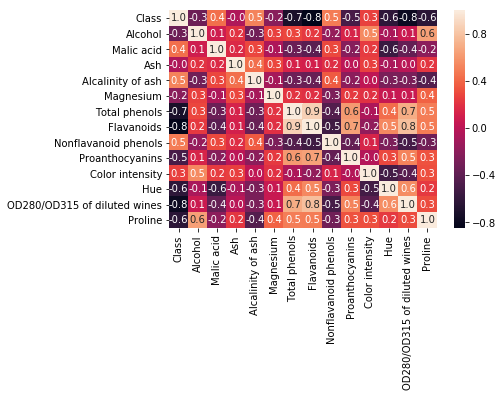

In [9]:
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.1f')

In [10]:
for col in data.columns:
  temp=data[data[col].isnull()].shape[0]
  print('{}-{}'.format(col, temp))
print("----------------------")
data.dtypes

Class-0
Alcohol-0
Malic acid-0
Ash-0
Alcalinity of ash-0
Magnesium-0
Total phenols-0
Flavanoids-0
Nonflavanoid phenols-0
Proanthocyanins-0
Color intensity-0
Hue-0
OD280/OD315 of diluted wines-0
Proline-0
----------------------


Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

Заметим что датасет не содержит категориальных признаков и пропусков

### Выбор метрик
Для оценки качества моделей будем использовать следующие метрики:
-Средняя абсолютная ошибка 
-Каппа Коэна

In [0]:
from sklearn.metrics import mean_absolute_error, cohen_kappa_score

### Выбор моделей
В качестве моделей возьмем линейную модель стохастического спуска, дерево решений и ансамблевый метод повышения градиента


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Разделение выборки на обучающую и тестовую

In [20]:
CLASS = 'Class'
RANDOM_STATE = 17
TEST_SIZE = 0.3

X = data.drop(CLASS, axis=1).values
Y = data[CLASS].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=Y)
print('X_train: {}'.format(X_train.shape))
print('X_test: {}'.format(X_test.shape))

X_train: (124, 13)
X_test: (54, 13)


### Построение базового решения без подбора гиперпараметров

In [0]:
class Classifier():
  def __init__(self, method, x_train, y_train, x_test, y_test):
    self._method = method
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test
    self.tar1 = []
    self.tar2 = []
  def training(self):
    self._method.fit(self.x_train,self.y_train)
    self.tar2 = self._method.predict(self.x_test)
  def result(self,metric):
    print(metric(self.y_test,self.tar2)*100)

SGD -  реализует регуляризованные линейные модели с обучением по случайному градиентному спуску (SGD): градиент потерь оценивается для каждой выборки за раз, и модель обновляется по мере уменьшения  скорости обучения.

In [23]:
#Линейные модели
sgdlinear = Classifier(SGDClassifier(), X_train, Y_train, X_test, Y_test)
sgdlinear.training()
sgdlinear.result(mean_absolute_error)
sgdlinear.result(cohen_kappa_score)

40.74074074074074
44.208809135399676


Модель, которая прогнозирует значение целевой переменной путем изучения простых правил принятия решений, выведенных из функций данных.

In [24]:
dtc = Classifier(DecisionTreeClassifier(random_state=5), X_train, Y_train, X_test, Y_test)
dtc.training()
dtc.result(mean_absolute_error)
dtc.result(cohen_kappa_score)

1.8518518518518516
97.20062208398133


In [25]:
gbc=Classifier(GradientBoostingClassifier(max_features=2), X_train, Y_train, X_test, Y_test)
gbc.training()
gbc.result(mean_absolute_error)
gbc.result(cohen_kappa_score)

0.0
100.0


### Подбор гиперпараметра К

In [29]:
n_range = np.array(range(5,95,10))
n_range = n_range/100
tp=[{'l1_ratio':n_range}]

lgscv = GridSearchCV(SGDClassifier(), tp, scoring='accuracy')
lgscv.fit(X_train, Y_train)

bp1=lgscv.best_params_['l1_ratio']
bp1

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.15

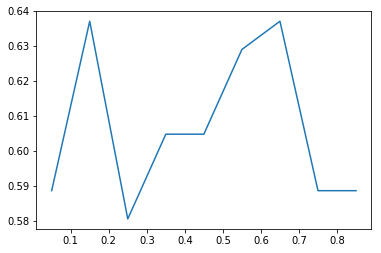

In [30]:
plt.plot(n_range,lgscv.cv_results_['mean_test_score'])

In [34]:
n_range = np.array(range(1,10,1))
tp=[{'max_depth':n_range}]

tgscv = GridSearchCV(DecisionTreeClassifier(random_state=1), tp, cv=5, scoring='accuracy')
tgscv.fit(X_train, Y_train)

bp2=tgscv.best_params_['max_depth']
bp2

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


4

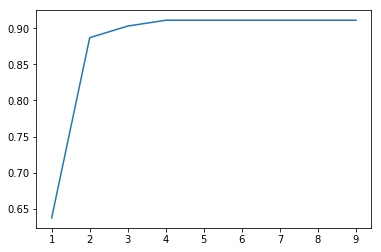

In [35]:
plt.plot(n_range,tgscv.cv_results_['mean_test_score'])

In [37]:
n_range = np.array(range(1,11,1))
n_range = n_range/10
tp=[{'max_features':n_range}]

gbcgscv = GridSearchCV(GradientBoostingClassifier(), tp, cv=5, scoring='accuracy')
gbcgscv.fit(X_train, Y_train)

bp3=gbcgscv.best_params_['max_features']
bp3

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.2

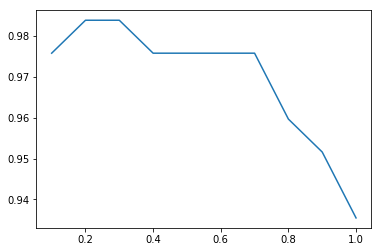

In [38]:
plt.plot(n_range,gbcgscv.cv_results_['mean_test_score'])

### Сравнение моделей

In [39]:
#Линейные модели
sgdlinear.result(mean_absolute_error)
sgdlinear.result(cohen_kappa_score)
print("___________________________________")
sgdlinear2 = Classifier(SGDClassifier(l1_ratio=bp1), X_train, Y_train, X_test, Y_test)
sgdlinear2.training()
sgdlinear2.result(mean_absolute_error)
sgdlinear.result(cohen_kappa_score)

40.74074074074074
44.208809135399676
___________________________________
55.55555555555556
44.208809135399676


In [40]:
#DTC
dtc.result(mean_absolute_error)
dtc.result(cohen_kappa_score)
print("___________________________________")
dtc2 = Classifier(DecisionTreeClassifier(random_state=bp2), X_train, Y_train, X_test, Y_test)
dtc2.training()
dtc2.result(mean_absolute_error)
dtc2.result(cohen_kappa_score)


1.8518518518518516
97.20062208398133
___________________________________
1.8518518518518516
97.20062208398133


In [41]:
gbc.result(mean_absolute_error)
gbc.result(cohen_kappa_score)
print("vs")
gbc2=Classifier(GradientBoostingClassifier(max_features=bp3), X_train, Y_train, X_test, Y_test)
gbc2.training()
gbc2.result(mean_absolute_error)
gbc2.result(cohen_kappa_score)

0.0
100.0
vs
0.0
100.0


### Выводы:
<div>По полученным моделям и значениям можно сделать следующие выводы:

<div> 1. Наилучшим методом оказался ансамблевский GradiendBoosting показав средние ~100%
<div> 2. Несмотря на визуально незначительный прирост после использования расчитанных гиперпараметров использовать случайные гиперпараметры не рекоммендуется.
  


### Литература
<div> 1. Heart Disease UCI: https://www.kaggle.com/ronitf/heart-disease-uci
<div> 2. Scikit-learn docs: https://scikit-learn.org/stable/modules/